In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.4 MB/s 
     |████████████████████████████████| 186 kB 49.5 MB/s 
     |████████████████████████████████| 1.2 MB 35.6 MB/s 
     |████████████████████████████████| 46 kB 4.2 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 51 kB 333 kB/s 


In [ ]:
!pip install -q jmd_imagescraper                 # image scaraper library by Joe Dockrill, download images from duckduckgo

from fastbook import *                          #import everything from fast book

from fastai.vision.widgets import *              # * means import every thing from that library

#import the image scraper by @JoeDockrill, website: https://joedockrill.github.io/blog/2020/09/18/jmd-imagescraper-library/
from jmd_imagescraper.core import * 
from pathlib import Path
from jmd_imagescraper.imagecleaner import *    


In [ ]:
animals=['grizzly_bear','teddy_bear','black_bear']    # animal is a folder to which we can download our images
path = Path().cwd()/"animals"                        #assigns path to current working directory

In [ ]:
duckduckgo_search(path,"grizzly_bear","grizzly bears",max_results=100)  #downloads 100 images of 'grizzly bears' and saves it in path/grizzly_bear
duckduckgo_search(path,"teddy_bear","teddy bears",max_results=100) # download 100 images of teddy bears
duckduckgo_search(path,"black_bear","black bears",max_results=100) # download 100 images of black bears

Duckduckgo search: grizzly bears


Duckduckgo search: teddy bears


Duckduckgo search: black bears


[Path('/content/animals/black_bear/001_91e3cab9.jpg'),
 Path('/content/animals/black_bear/002_95b6b63e.jpg'),
 Path('/content/animals/black_bear/003_e1365716.jpg'),
 Path('/content/animals/black_bear/004_85c40ac8.jpg'),
 Path('/content/animals/black_bear/005_974f3fc8.jpg'),
 Path('/content/animals/black_bear/006_2175490b.jpg'),
 Path('/content/animals/black_bear/007_610e62dd.jpg'),
 Path('/content/animals/black_bear/008_6e15b2f2.jpg'),
 Path('/content/animals/black_bear/009_7de39e11.jpg'),
 Path('/content/animals/black_bear/010_f79fbc3b.jpg'),
 Path('/content/animals/black_bear/011_91aa9d55.jpg'),
 Path('/content/animals/black_bear/012_407c6908.jpg'),
 Path('/content/animals/black_bear/013_a16ddf6f.jpg'),
 Path('/content/animals/black_bear/014_0c7628eb.jpg'),
 Path('/content/animals/black_bear/015_1c6d58ea.jpg'),
 Path('/content/animals/black_bear/016_b6971c57.jpg'),
 Path('/content/animals/black_bear/017_14a9baed.jpg'),
 Path('/content/animals/black_bear/018_6767f69d.jpg'),
 Path('/co

In [ ]:
display_image_cleaner(path)   # GUI to display images, delete the unwanted ones to clean the dataset
# Need to go through all the classes and clean the unwanted ones
# Cleaning the datasets will greatly increase our model accuracy

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [ ]:
fns = get_image_files(path) # this returns the all the paths of the images
fns

(#300) [Path('/content/animals/teddy_bear/071_eedee4d9.jpg'),Path('/content/animals/teddy_bear/082_1de11cd5.jpg'),Path('/content/animals/teddy_bear/059_233c8c27.jpg'),Path('/content/animals/teddy_bear/048_eebdf865.jpg'),Path('/content/animals/teddy_bear/004_145c741e.jpg'),Path('/content/animals/teddy_bear/075_a805b668.jpg'),Path('/content/animals/teddy_bear/032_40a08851.jpg'),Path('/content/animals/teddy_bear/096_e765d1d0.jpg'),Path('/content/animals/teddy_bear/037_cc045ec3.jpg'),Path('/content/animals/teddy_bear/077_0ef5f14a.jpg')...]

In [ ]:
failed = verify_images(fns) # verify that all the stuff we downloaded are images
failed

(#0) []

In [ ]:
failed.map(Path.unlink);  # unlinking failed images from our path 

In [ ]:
# Creating DataBlock object
# DataBlock Object sends our images to Data Loaders
# Data loaders convert our data in such form which our learner can understand and interpret
animals = DataBlock(     
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),  #splits the dataset into a training set and validation set
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [ ]:
dls = animals.dataloaders(path)   # dls is our dataloaders object

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


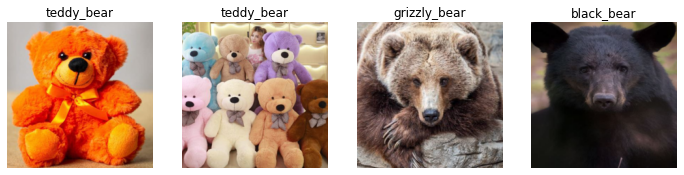

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
# here we pass our dataloader into our cnn learner
# cnn learner forms the convolutional neural network
# Pre-trained model is also passed to our learner
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)
# We train our model along with fine tuning the pre-trained model for our data

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.611132,0.406902,0.200000,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.529908,0.133189,0.033333,00:04
1,0.414699,0.050231,0.016667,00:04
2,0.302670,0.030606,0.000000,00:04
3,0.269033,0.022854,0.000000,00:04


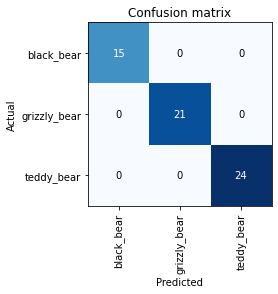

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

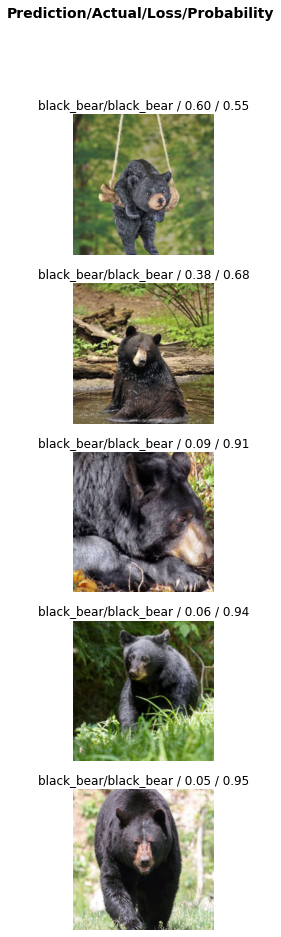

In [ ]:
interp.plot_top_losses(5, nrows=5)

In [ ]:
# This creates an upload button for the image to be taken
learn.export()
path = Path()
path.ls(file_exts='.pkl')

learn_inf = load_learner(path/'export.pkl')

btn_upload = widgets.FileUpload() #Displays a widget which can be used to upload images from your system
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))   #resizes the uloaded image
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)#asks the model to predict the animal in the image!
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'#displays the output in a readable format
lbl_pred

Label(value='Prediction: teddy_bear; Probability: 1.0000')

In [ ]:
# Button to classify our upload
 
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
# This function is called when the button "Classify" is clicked
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)  # on_click function is called when the button is pressed

In [ ]:
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [ ]:
# putting all the butten and classifer button in vertical box
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])